In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('/media/lvision/Sabrent/kaggle/2013/amazon-employee-access-challenge/train.csv')
test_df = pd.read_csv('/media/lvision/Sabrent/kaggle/2013/amazon-employee-access-challenge/test.csv')
print(train_df.shape)
print(type(train_df))
print(test_df.shape)
print(type(test_df))


(32769, 10)
<class 'pandas.core.frame.DataFrame'>
(58921, 10)
<class 'pandas.core.frame.DataFrame'>


In [3]:
train_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [4]:
test_df.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [5]:
y = train_df['ACTION']
X = train_df.drop(columns='ACTION') # or X = train_df.drop('ACTION', axis=1)

X_test = test_df.drop(columns='id')

In [6]:
SEED = 1

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [7]:
# From now on, we try different packages
# including: catboost, xgboost, lightgbm, h2o, etc.

In [8]:
import catboost as ctb

In [9]:
%%time

params = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': SEED
         }
cbc_1 = ctb.CatBoostClassifier(**params)
cbc_1.fit(X_train, y_train, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_valid, y_valid), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True # True for visualization of the training process (it is not shown in a published kernel - try executing this code)
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.069882
0:	test: 0.5400959	best: 0.5400959 (0)	total: 53.7ms	remaining: 53.6s
200:	test: 0.8020842	best: 0.8020842 (200)	total: 1.05s	remaining: 4.17s
400:	test: 0.8237941	best: 0.8237941 (400)	total: 2.03s	remaining: 3.03s
600:	test: 0.8328464	best: 0.8330283 (598)	total: 3.01s	remaining: 2s
800:	test: 0.8366271	best: 0.8370599 (785)	total: 4.01s	remaining: 997ms
999:	test: 0.8417832	best: 0.8417832 (999)	total: 5s	remaining: 0us

bestTest = 0.8417831567
bestIteration = 999

CPU times: user 1min 59s, sys: 11.3 s, total: 2min 10s
Wall time: 5.1 s


In [10]:
cat_features = list(range(X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [11]:
condition = True # here we specify what condition should be satisfied only by the names of categorical features
cat_features_names = [col for col in X.columns if condition]
cat_features = [X.columns.get_loc(col) for col in cat_features_names]
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [12]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': cat_features,
          'verbose': 200,
          'random_seed': SEED
         }
cbc_2 = ctb.CatBoostClassifier(**params)
cbc_2.fit(X_train, y_train,
          eval_set=(X_valid, y_valid),
          use_best_model=True,
          plot=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.069882
0:	test: 0.5637606	best: 0.5637606 (0)	total: 29.9ms	remaining: 29.9s
200:	test: 0.8959353	best: 0.8959406 (199)	total: 5s	remaining: 19.9s
400:	test: 0.8985289	best: 0.8990341 (378)	total: 10.6s	remaining: 15.8s
600:	test: 0.9005314	best: 0.9006239 (594)	total: 16.2s	remaining: 10.8s
800:	test: 0.9003434	best: 0.9014996 (744)	total: 21.7s	remaining: 5.38s
999:	test: 0.8999324	best: 0.9014996 (744)	total: 26.3s	remaining: 0us

bestTest = 0.9014995851
bestIteration = 744

Shrink model to first 745 iterations.
CPU times: user 11min 50s, sys: 32.5 s, total: 12min 23s
Wall time: 26.5 s


In [13]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': cat_features,
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': SEED
         }
cbc_2 = ctb.CatBoostClassifier(**params)
cbc_2.fit(X_train, y_train, 
          eval_set=(X_valid, y_valid), 
          use_best_model=True, 
          plot=True
         );


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.069882
0:	test: 0.5637606	best: 0.5637606 (0)	total: 18.8ms	remaining: 18.8s
200:	test: 0.8959353	best: 0.8959406 (199)	total: 5.08s	remaining: 20.2s
400:	test: 0.8985289	best: 0.8990341 (378)	total: 10.6s	remaining: 15.9s
600:	test: 0.9005314	best: 0.9006239 (594)	total: 16.3s	remaining: 10.8s
800:	test: 0.9003434	best: 0.9014996 (744)	total: 21.9s	remaining: 5.43s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9014995851
bestIteration = 744

Shrink model to first 745 iterations.
CPU times: user 11min 39s, sys: 33.3 s, total: 12min 12s
Wall time: 25.5 s


In [14]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': cat_features,
          'task_type': 'GPU',
          'verbose': 200,
          'random_seed': SEED
         }
cbc_3 = ctb.CatBoostClassifier(**params)
cbc_3.fit(X_train, y_train,
          eval_set=(X_valid, y_valid), 
          use_best_model=True,
          plot=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.054241
0:	learn: 0.6174190	test: 0.6184174	best: 0.6184174 (0)	total: 33.4ms	remaining: 33.3s
200:	learn: 0.8536408	test: 0.8762504	best: 0.8762504 (200)	total: 6.53s	remaining: 26s
400:	learn: 0.8636365	test: 0.8807679	best: 0.8807842 (398)	total: 13s	remaining: 19.5s
600:	learn: 0.8688402	test: 0.8825358	best: 0.8826348 (587)	total: 19.5s	remaining: 12.9s
800:	learn: 0.8726251	test: 0.8827334	best: 0.8829701 (760)	total: 25.9s	remaining: 6.44s
999:	learn: 0.8763252	test: 0.8832531	best: 0.8835157 (986)	total: 32.7s	remaining: 0us
bestTest = 0.8835157454
bestIteration = 986
Shrink model to first 987 iterations.
CPU times: user 42.1 s, sys: 4.77 s, total: 46.8 s
Wall time: 33.2 s


In [15]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': cat_features,
          'task_type': 'GPU',
          'border_count': 32,
          'verbose': 200,
          'random_seed': SEED
         }
cbc_4 = ctb.CatBoostClassifier(**params)
cbc_4.fit(X_train, y_train, 
          eval_set=(X_valid, y_valid), 
          use_best_model=True, 
          plot=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.054241
0:	learn: 0.6174190	test: 0.6184174	best: 0.6184174 (0)	total: 26.4ms	remaining: 26.3s
200:	learn: 0.8536408	test: 0.8762504	best: 0.8762504 (200)	total: 6.61s	remaining: 26.3s
400:	learn: 0.8636365	test: 0.8807679	best: 0.8807842 (398)	total: 13.1s	remaining: 19.6s
600:	learn: 0.8688402	test: 0.8825358	best: 0.8826348 (587)	total: 19.5s	remaining: 13s
800:	learn: 0.8726251	test: 0.8827334	best: 0.8829701 (760)	total: 26s	remaining: 6.45s
999:	learn: 0.8763252	test: 0.8832522	best: 0.8835146 (986)	total: 32.4s	remaining: 0us
bestTest = 0.8835146129
bestIteration = 986
Shrink model to first 987 iterations.
CPU times: user 42.5 s, sys: 4.17 s, total: 46.7 s
Wall time: 32.9 s


In [16]:
np.random.seed(SEED)
noise_cols = [f'noise_{i}' for i in range(5)]
for col in noise_cols:
    X_train[col] = y_train * np.random.rand(X_train.shape[0])
    X_valid[col] = np.random.rand(X_valid.shape[0])

In [17]:
X_train.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,noise_0,noise_1,noise_2,noise_3,noise_4
16773,27798,1350,117961,118052,122938,117905,117906,290919,117908,0.417022,0.097850,0.665600,0.979025,0.491624
23491,80701,4571,117961,118225,119924,118685,279443,308574,118687,0.720324,0.855900,0.311763,0.929346,0.391708
32731,34039,5113,117961,118300,119890,119433,133686,118424,119435,0.000114,0.287838,0.896624,0.704050,0.606467
7855,42085,4733,118290,118291,120126,118980,166203,118295,118982,0.302333,0.264320,0.482195,0.028493,0.182570
16475,16358,6046,117961,118446,120317,307024,306404,118331,118332,0.146756,0.022876,0.009307,0.726750,0.623357


In [18]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': cat_features,
          'verbose': 200,
          'random_seed': SEED
         }
cbc_5 = ctb.CatBoostClassifier(**params)
cbc_5.fit(X_train, y_train, 
          eval_set=(X_valid, y_valid), 
          use_best_model=True, 
          plot=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.069882
0:	test: 0.4990944	best: 0.4990944 (0)	total: 12.7ms	remaining: 12.7s
200:	test: 0.5831370	best: 0.5894476 (7)	total: 2.58s	remaining: 10.3s
400:	test: 0.5831376	best: 0.5894476 (7)	total: 4.77s	remaining: 7.13s
600:	test: 0.5831376	best: 0.5894476 (7)	total: 7.19s	remaining: 4.77s
800:	test: 0.5831378	best: 0.5894476 (7)	total: 9.2s	remaining: 2.29s
999:	test: 0.5831381	best: 0.5894476 (7)	total: 10.9s	remaining: 0us

bestTest = 0.5894475816
bestIteration = 7

Shrink model to first 8 iterations.
CPU times: user 4min 25s, sys: 13.9 s, total: 4min 39s
Wall time: 11.1 s


In [19]:
ignored_features = list(range(X_train.shape[1] - 5, X_train.shape[1]))
print(ignored_features)

[9, 10, 11, 12, 13]


In [20]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': cat_features,
          'ignored_features': ignored_features,
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': SEED
         }
cbc_6 = ctb.CatBoostClassifier(**params)
cbc_6.fit(X_train, y_train, 
          eval_set=(X_valid, y_valid), 
          use_best_model=True, 
          plot=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.069882
0:	test: 0.5637606	best: 0.5637606 (0)	total: 19.2ms	remaining: 19.2s
200:	test: 0.8959353	best: 0.8959406 (199)	total: 5.03s	remaining: 20s
400:	test: 0.8985289	best: 0.8990341 (378)	total: 10.5s	remaining: 15.8s
600:	test: 0.9005314	best: 0.9006239 (594)	total: 16.2s	remaining: 10.8s
800:	test: 0.9003434	best: 0.9014996 (744)	total: 21.7s	remaining: 5.38s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9014995851
bestIteration = 744

Shrink model to first 745 iterations.
CPU times: user 11min 46s, sys: 34.3 s, total: 12min 21s
Wall time: 25.4 s


In [21]:
X_train = X_train.drop(columns=noise_cols)
X_valid = X_valid.drop(columns=noise_cols)

In [22]:
X_train.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
16773,27798,1350,117961,118052,122938,117905,117906,290919,117908
23491,80701,4571,117961,118225,119924,118685,279443,308574,118687
32731,34039,5113,117961,118300,119890,119433,133686,118424,119435
7855,42085,4733,118290,118291,120126,118980,166203,118295,118982
16475,16358,6046,117961,118446,120317,307024,306404,118331,118332


In [23]:
train_data = ctb.Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )

valid_data = ctb.Pool(data=X_valid,
                  label=y_valid,
                  cat_features=cat_features
                 )

In [24]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
#           'cat_features': cat_features, # we don't need to specify this parameter as 
#                                           pool object contains info about categorical features
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': SEED
         }

cbc_7 = ctb.CatBoostClassifier(**params)
cbc_7.fit(train_data, # instead of X_train, y_train
          eval_set=valid_data, # instead of (X_valid, y_valid)
          use_best_model=True, 
          plot=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.069882
0:	test: 0.5637606	best: 0.5637606 (0)	total: 16.6ms	remaining: 16.6s
200:	test: 0.8959353	best: 0.8959406 (199)	total: 5.04s	remaining: 20s
400:	test: 0.8985289	best: 0.8990341 (378)	total: 10.6s	remaining: 15.8s
600:	test: 0.9005314	best: 0.9006239 (594)	total: 16.3s	remaining: 10.8s
800:	test: 0.9003434	best: 0.9014996 (744)	total: 21.8s	remaining: 5.4s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9014995851
bestIteration = 744

Shrink model to first 745 iterations.
CPU times: user 11min 48s, sys: 34.4 s, total: 12min 22s
Wall time: 25.3 s


In [25]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed': SEED
         }

all_train_data = ctb.Pool(data=X,
                      label=y,
                      cat_features=cat_features
                     )

scores = ctb.cv(pool=all_train_data,
            params=params, 
            fold_count=4,
            seed=SEED, 
            shuffle=True,
            stratified=True, # if True the folds are made by preserving the percentage of samples for each class
            plot=True
           )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 20.9ms	remaining: 20.9s
200:	test: 0.8938231	best: 0.8938231 (200)	total: 9.4s	remaining: 37.4s
400:	test: 0.8976768	best: 0.8976768 (400)	total: 20.5s	remaining: 30.7s
600:	test: 0.9016370	best: 0.9016602 (599)	total: 31.9s	remaining: 21.2s
800:	test: 0.9027846	best: 0.9027909 (799)	total: 43.4s	remaining: 10.8s
999:	test: 0.9035137	best: 0.9035137 (999)	total: 54.9s	remaining: 0us

bestTest = 0.9035137273
bestIteration = 999

Training on fold [1/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 23ms	remaining: 23s
200:	test: 0.8827467	best: 0.8832037 (146)	total: 9.55s	remaining: 38s
400:	test: 0.8844741	best: 0.8844968 (397)	total: 20.8s	remaining: 31s
600:	test: 0.8860410	best: 0.8864452 (506)	total: 32.8s	remaining: 21.8s
800:	test: 0.8864595	best: 0.8864742 (799)	total: 44.7s	remaining: 11.1s
999:	test: 0.8850072	best: 0.8864950 (822)	total: 56.4s	remaining: 0us

bestTest = 0.8864949928
bestIteration = 822

Train

In [26]:
cbc_7.get_feature_importance(prettified=True)


,Feature Id,Importances
0,RESOURCE,18.981667
1,ROLE_DEPTNAME,16.202565
2,ROLE_ROLLUP_2,14.275839
3,MGR_ID,14.208860
4,ROLE_FAMILY_DESC,9.218010
5,ROLE_TITLE,7.735600
6,ROLE_FAMILY,7.057141
7,ROLE_ROLLUP_1,6.572883
8,ROLE_CODE,5.747437


In [27]:
feature_importance_df = pd.DataFrame(cbc_7.get_feature_importance(prettified=True), columns=['Feature Id', 'Importances'])
feature_importance_df

,Feature Id,Importances
0,RESOURCE,18.981667
1,ROLE_DEPTNAME,16.202565
2,ROLE_ROLLUP_2,14.275839
3,MGR_ID,14.208860
4,ROLE_FAMILY_DESC,9.218010
5,ROLE_TITLE,7.735600
6,ROLE_FAMILY,7.057141
7,ROLE_ROLLUP_1,6.572883
8,ROLE_CODE,5.747437


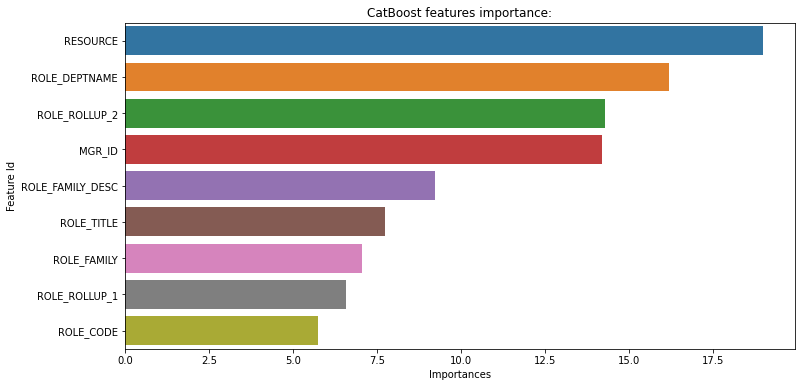

In [28]:
plt.figure(figsize=(12, 6));
sns.barplot(x="Importances", y="Feature Id", data=feature_importance_df);
plt.title('CatBoost features importance:');

In [29]:
import shap
explainer = shap.TreeExplainer(cbc_7) # insert your model
shap_values = explainer.shap_values(train_data) # insert your train Pool object

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:100,:], X_train.iloc[:100,:])

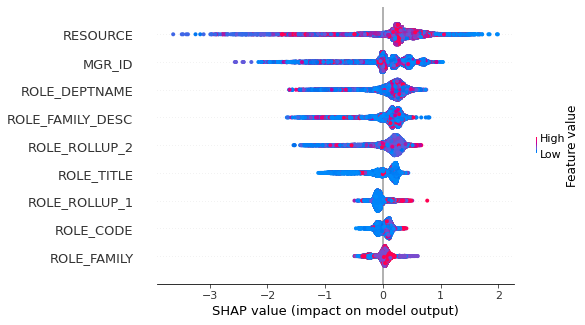

In [30]:
shap.summary_plot(shap_values, X_train)

In [31]:
%%time

from sklearn.model_selection import StratifiedKFold

n_fold = 4 # amount of data folds
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=SEED)

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed': SEED
         }

test_data = ctb.Pool(data=X_test,
                 cat_features=cat_features)

scores = []
prediction = np.zeros(X_test.shape[0])
for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
    
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index] # train and validation data splits
    y_train, y_valid = y[train_index], y[valid_index]
    
    train_data = ctb.Pool(data=X_train, 
                      label=y_train,
                      cat_features=cat_features)
    valid_data = ctb.Pool(data=X_valid, 
                      label=y_valid,
                      cat_features=cat_features)
    
    model = ctb.CatBoostClassifier(**params)
    model.fit(train_data,
              eval_set=valid_data, 
              use_best_model=True
             )
    
    score = model.get_best_score()['validation']['AUC']
    scores.append(score)

    y_pred = model.predict_proba(test_data)[:, 1]
    prediction += y_pred

prediction /= n_fold
print('CV mean: {:.4f}, CV std: {:.4f}'.format(np.mean(scores), np.std(scores)))

Learning rate set to 0.069882
0:	test: 0.5797111	best: 0.5797111 (0)	total: 18.7ms	remaining: 18.7s
200:	test: 0.8638646	best: 0.8638646 (200)	total: 5.21s	remaining: 20.7s
400:	test: 0.8678851	best: 0.8679522 (398)	total: 10.7s	remaining: 16s
600:	test: 0.8701402	best: 0.8701489 (589)	total: 16.4s	remaining: 10.9s
800:	test: 0.8708947	best: 0.8715082 (745)	total: 22.2s	remaining: 5.51s
999:	test: 0.8708311	best: 0.8721216 (875)	total: 27.9s	remaining: 0us

bestTest = 0.8721216295
bestIteration = 875

Shrink model to first 876 iterations.
Learning rate set to 0.069883
0:	test: 0.5000000	best: 0.5000000 (0)	total: 5.46ms	remaining: 5.45s
200:	test: 0.8957267	best: 0.8957267 (200)	total: 5.18s	remaining: 20.6s
400:	test: 0.9009627	best: 0.9009908 (396)	total: 11s	remaining: 16.4s
600:	test: 0.9022419	best: 0.9023966 (565)	total: 16.8s	remaining: 11.1s
800:	test: 0.9020686	best: 0.9023966 (565)	total: 22.6s	remaining: 5.61s
999:	test: 0.9010471	best: 0.9023966 (565)	total: 28.3s	remaining

In [32]:
sub = pd.read_csv('/media/lvision/Sabrent/kaggle/2013/amazon-employee-access-challenge/sampleSubmission.csv')
sub['Action'] = prediction
sub_name = 'catboost_submission.csv'
sub.to_csv(sub_name, index=False)

print(f'Saving submission file as: {sub_name}')

Saving submission file as: catboost_submission.csv
